# Demo 1: Autocorrelation 

In [6]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider 

In [84]:
# Set simulation parameters 
N    = 201
tmin = 0
tmax = 100
t    = np.linspace(tmin,tmax,N)

In [85]:
# Construct lac vector
lag_0   = 0.0 
lag_int = t[1] - t[0]
lag_fin = t[N-1]/4.

In [86]:
# vector of dimensionalized lags
lag_vec = np.arange(lag_0,lag_fin+lag_int,lag_int)

In [87]:
# vector of time indices representing closest match to specified lags
values  = np.expand_dims(lag_vec, axis=-1) 
lag_idx = np.abs(t - values).argmin(axis=-1)

__Sinusoid__

<IPython.core.display.Javascript object>


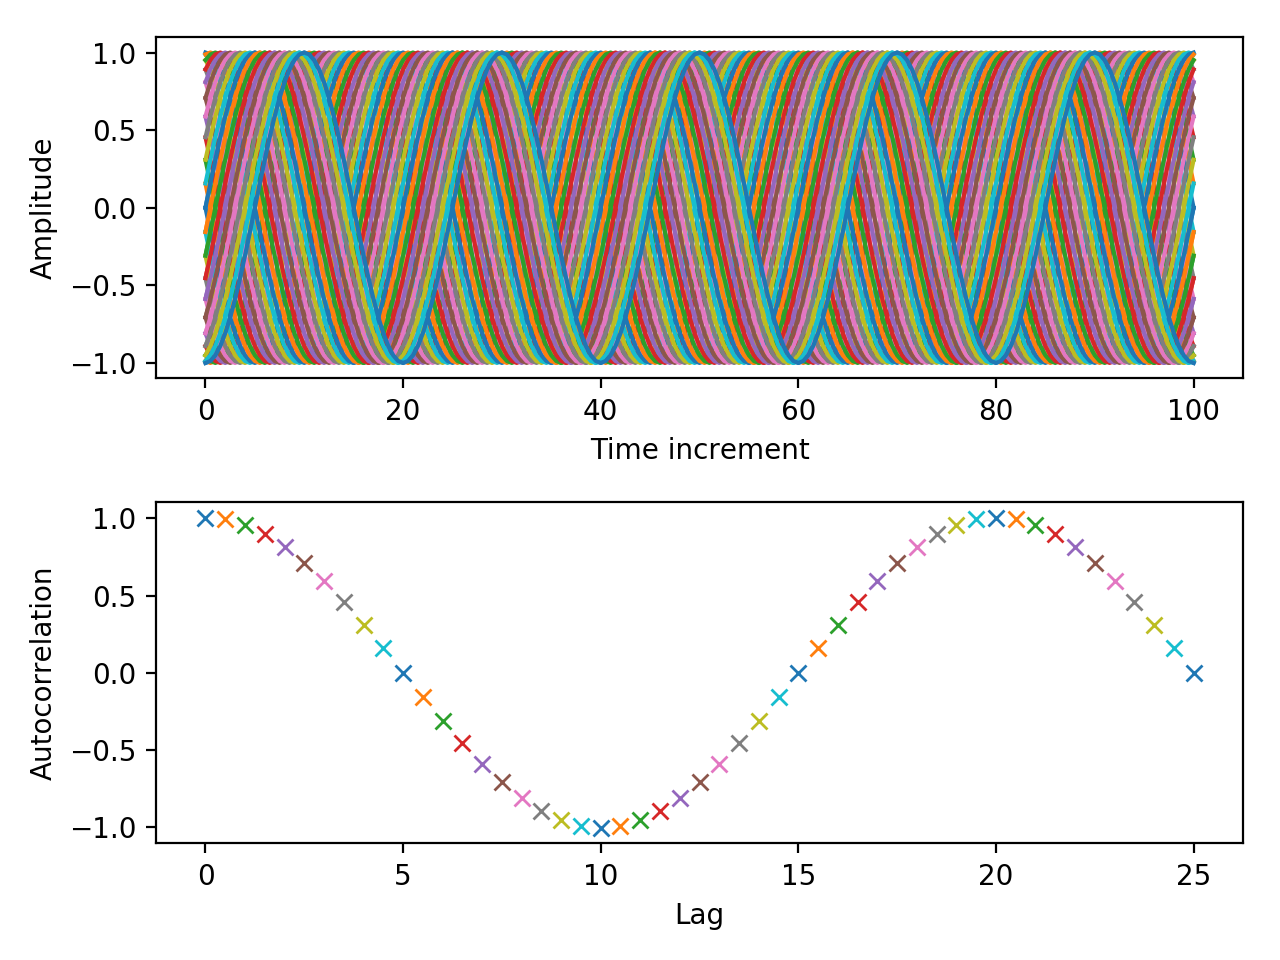

In [113]:
fig, ax = plt.subplots(2,1)
y     = np.sin(2*np.pi*t/20)    # create synthetic sinusoid
ymean = np.mean(y)              # calculate sample mean
yvar  = np.var(y)               # calculate sample variance

alpha = np.arange(0,1.02,1/(lag_idx.shape[0]-1))


for i in range(len(lag_idx)):
    y_lag = np.sin(2*np.pi*(t-t[lag_idx[i]])/20.)
    ax[0].plot(t,y_lag)
    
    k = 0 # special case - periodic function 
    autocorr = np.sum( (y-ymean)*(y_lag-ymean))/(N-1-k)/yvar
    ax[1].plot(t[i],autocorr,'x')

ax[0].set_xlabel('Time increment')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')


plt.tight_layout()

In [97]:
y_lag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<IPython.core.display.Javascript object>


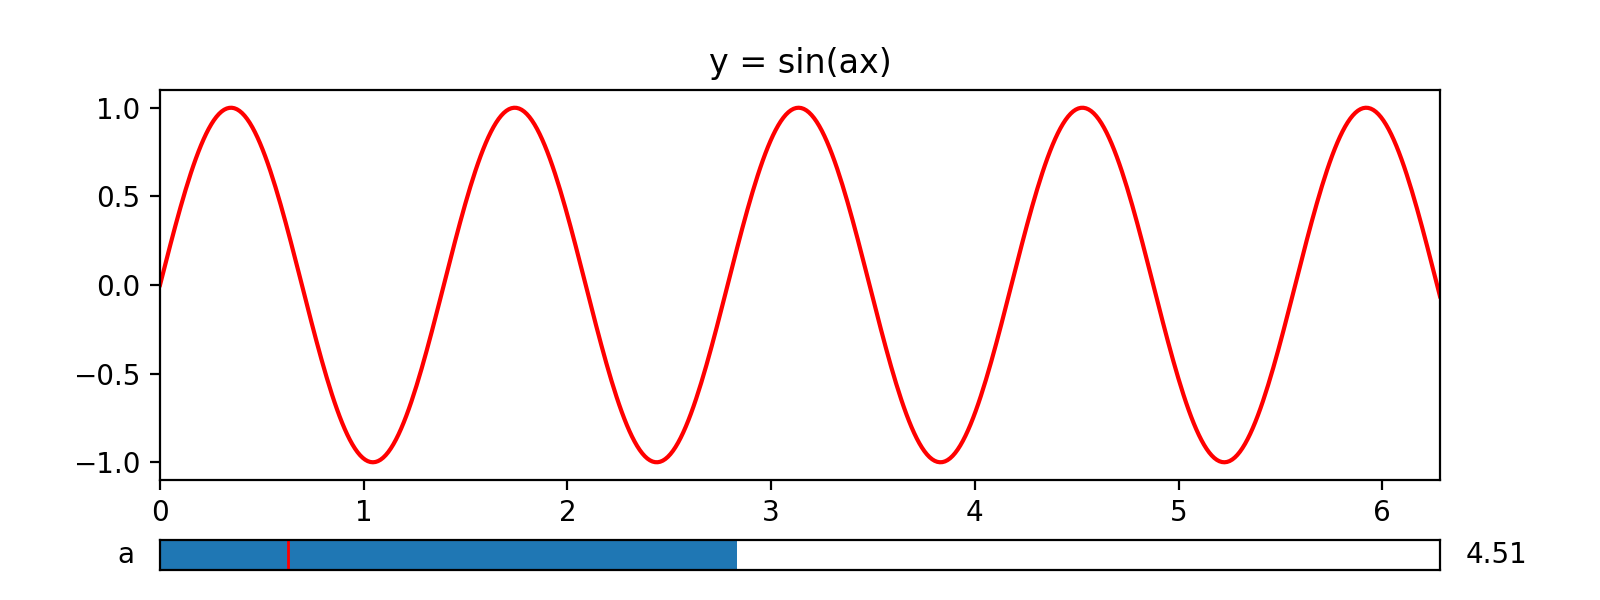

/Users/andrewnolan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


0

In [101]:
a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

x = np.linspace(0, 2*pi, 500)

fig = plt.figure(figsize=(8,3))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(sin_ax) # select sin_ax
plt.title('y = sin(ax)')
sin_plot, = plt.plot(x, np.sin(a_init*x), 'r')
plt.xlim(0, 2*pi)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    sin_plot.set_ydata(np.sin(a*x)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)